In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/anand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from collections import Counter

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier, VotingClassifier

In [159]:
sns.set()

In [160]:
df = pd.read_csv('input/spam.csv', encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [162]:
df.rename({'v1': 'class', 'v2': 'mail'},axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   mail        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [163]:
df[~df['Unnamed: 2'].isna()].filter(items=['Unnamed: 2'])

,Unnamed: 2
95,PO Box 5249
281,the person is definitely special for u..... B...
444,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...
671,"wanted to say hi. HI!!!\"" Stop? Send STOP to ..."
710,"this wont even start........ Datz confidence.."""
899,PO Box 5249
1038,GN
1127,".;-):-D"""
1266,just been in bedbut mite go 2 thepub l8tr if u...
1384,"bt not his girlfrnd... G o o d n i g h t . . .@"""


In [164]:
def join_strings(x: pd.Series):
    x.dropna(inplace=True)
    return ','.join(x)

df['mail'] = df[['mail', 'Unnamed: 2', 'Unnamed: 3','Unnamed: 4']].apply(join_strings, axis=1)

df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [165]:
df.info()
with open('file1.txt', mode='w') as file_object:
    print(df.to_string(header=True, index=True),file=file_object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [166]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head(5)

,class,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
df.isnull().sum()

class    0
mail     0
dtype: int64

In [168]:
df.duplicated().sum()

403

In [169]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

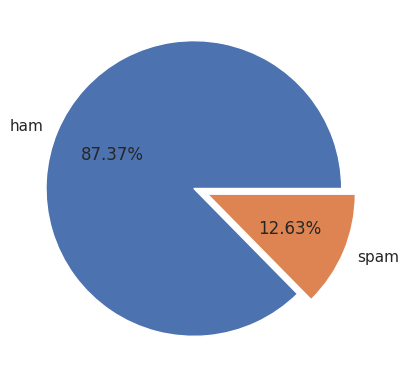

In [170]:
lables = ['ham', 'spam']
values = df['class'].value_counts()
plt.pie(values,labels=lables,autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [171]:
df['num_characters'] = df['mail'].apply(len)
df.head(5)

,class,mail,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [172]:
df['num_words'] = df['mail'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,class,mail,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [173]:
df['num_sentences'] = df['mail'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,class,mail,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [174]:
# For Ham
df[df['class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,71.060895,17.282551,1.826395
std,56.711542,13.590511,1.392743
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [175]:
# For Spam
df[df['class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.171516,27.758040,2.97856
std,29.916827,6.985279,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


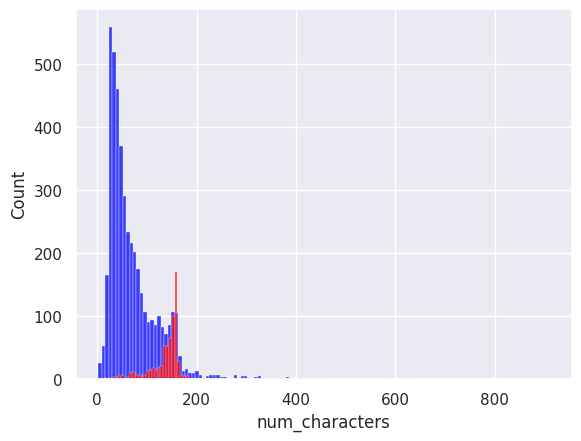

In [176]:
sns.histplot(df[df['class'] == 0]['num_characters'],color='blue')
sns.histplot(df[df['class'] == 1]['num_characters'],color='red')
plt.show()

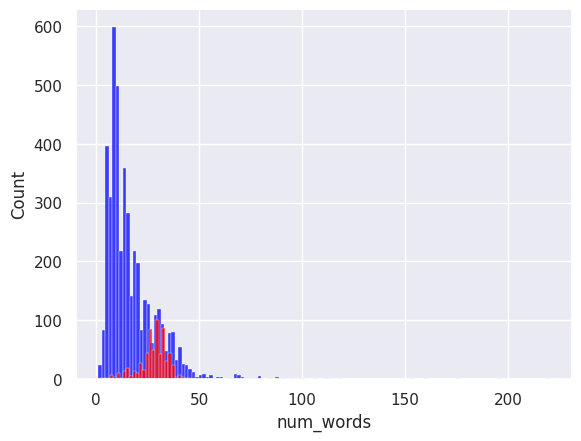

In [177]:
sns.histplot(df[df['class'] == 0]['num_words'],color='blue') #ham
sns.histplot(df[df['class'] == 1]['num_words'],color='red') #spam
plt.show()

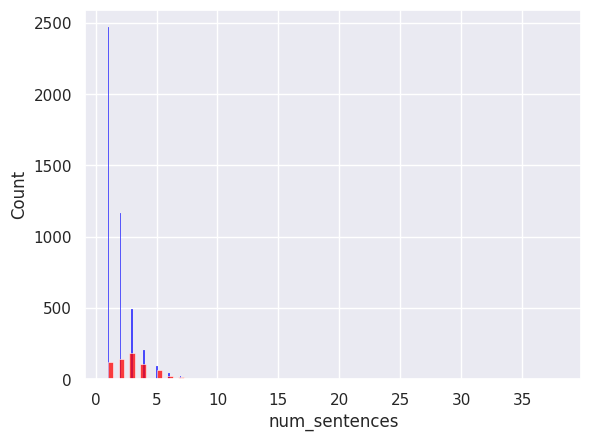

In [178]:
sns.histplot(df[df['class'] == 0]['num_sentences'],color='blue') #ham
sns.histplot(df[df['class'] == 1]['num_sentences'],color='red') #spam
plt.show()

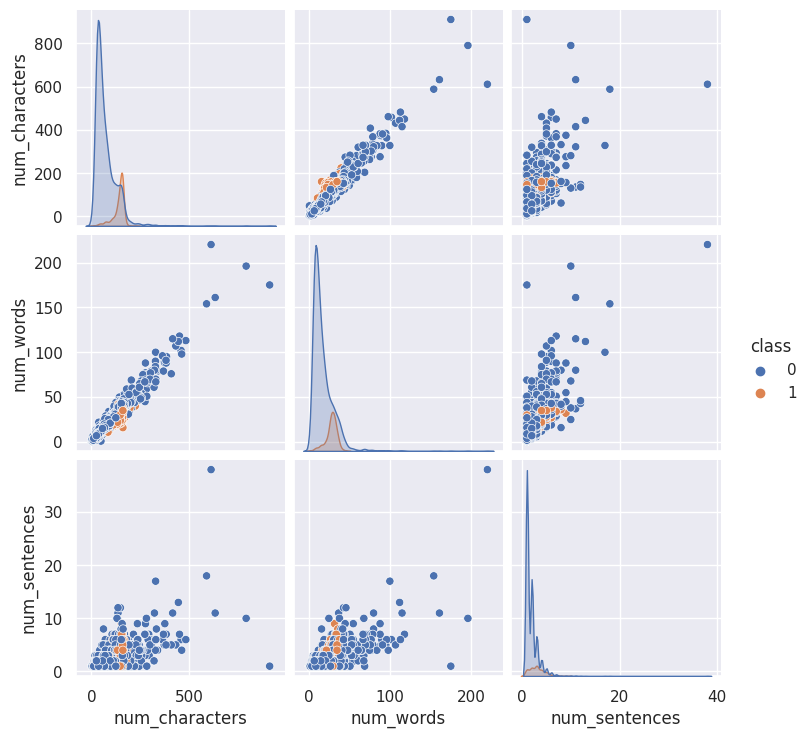

In [179]:
sns.pairplot(df,hue='class')
plt.show()

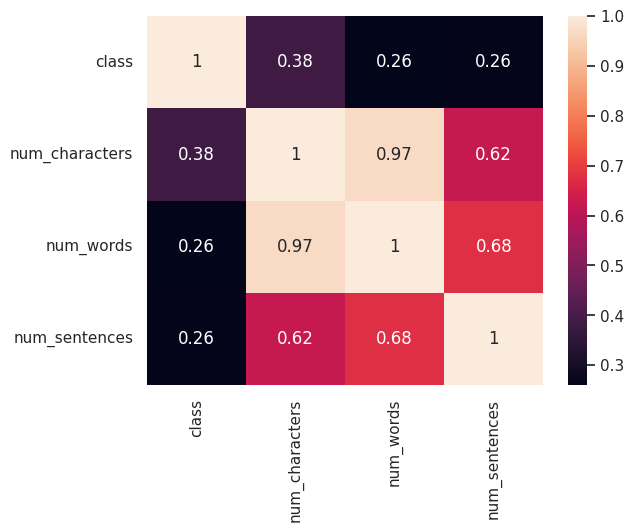

In [182]:
sns.heatmap(df[['class','num_characters','num_words','num_sentences']].corr(),annot=True)
plt.show()

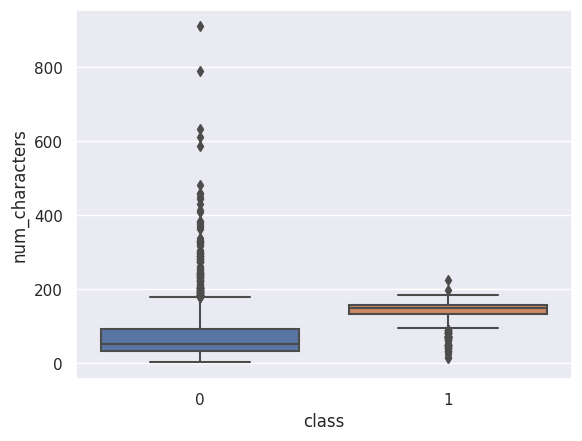

In [183]:
sns.boxplot(x='class',y='num_characters',data=df)
plt.show()

In [188]:
stemmer = PorterStemmer()

# returns processed text
def process_text(text: str) -> str:
    text = nltk.word_tokenize(text.lower())
    processed_text: list[str] = []
    for word in text:
        if(word.isalnum()):
            processed_text.append(word)
    
    text = processed_text[:]
    processed_text.clear()

    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            word_stem = stemmer.stem(word)
            processed_text.append(word_stem)
    
    return " ".join(processed_text)

In [189]:
df['transformed_mail'] = df['mail'].apply(process_text)
df.head(5)

,class,mail,num_characters,num_words,num_sentences,transformed_mail
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [191]:
ham_words_list: list[str] = df[df["class"] == 0]["transformed_mail"].str.cat(sep=" ").split()
spam_words_list: list[str] = df[df["class"] == 1]["transformed_mail"].str.cat(sep=" ").split()

print("lenth of ham words",len(ham_words_list))
print("length of spam words", len(spam_words_list))

lenth of ham words 35705
length of spam words 9964


In [197]:
ham_top30_wordlist: list[str] = pd.DataFrame(Counter(ham_words_list).most_common(30))
spam_top30_wordlist: list[str] = pd.DataFrame(Counter(spam_words_list).most_common(30))


In [195]:
ham_top30_wordlist.head(5)

,0,1
0,u,894
1,go,407
2,get,349
3,2,288
4,gt,288


In [196]:
spam_top30_wordlist.head(5)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [220]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(df['transformed_mail']).toarray()
X.shape

(5169, 3000)

In [217]:
tfidf_df: pd.DataFrame = pd.DataFrame(X[0],
    	index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"])
tfidf_df.sort_values('TF-IDF', ascending=False)

,TF-IDF
buffet,0.383631
la,0.339112
cine,0.339112
bugi,0.339112
crazi,0.313711
...,...
fathima,0.000000
fault,0.000000
fav,0.000000
fave,0.000000


In [223]:
Y = np.array(df['class'])
Y

array([0, 0, 1, ..., 0, 0, 0])

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=32,test_size=0.30)
print("train data shape", X_train.shape)
print("test data shape",X_test.shape)

train data shape (3618, 3000)
test data shape (1551, 3000)


In [229]:
gaussian_nb = GaussianNB()
bernoulli_nb = BernoulliNB()
miltinomial_nb = MultinomialNB()

def model_score(model,X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_true=Y_test,y_pred=Y_pred)
    precision = precision_score(y_true=Y_test,y_pred=Y_pred)
    confusion_mat = confusion_matrix(y_true=Y_test,y_pred=Y_pred)
    f1score = f1_score(y_true=Y_test,y_pred=Y_pred)

    return accuracy, precision, confusion_mat, f1score

In [230]:
model_score(gaussian_nb, X_train,X_test,Y_train,Y_test)

(0.8652482269503546,
 0.4537313432835821,
 array([[1190,  183],
        [  26,  152]]),
 0.5925925925925926)

In [231]:
model_score(bernoulli_nb, X_train,X_test,Y_train,Y_test)

(0.9832366215344939,
 0.9935064935064936,
 array([[1372,    1],
        [  25,  153]]),
 0.9216867469879518)

In [233]:
model_score(miltinomial_nb, X_train,X_test,Y_train,Y_test)

(0.9819471308833011,
 1.0,
 array([[1373,    0],
        [  28,  150]]),
 0.9146341463414633)

In [236]:
gaussian_accuracy=[]
bernoulli_accuracy=[]
multinomial_accuracy=[]

gaussian_precision=[]
bernoulli_precision=[]
multinomial_precision=[]

stratied_kfold = StratifiedKFold(n_splits = 8, shuffle=True, random_state=32)

for train_index, test_index in stratied_kfold.split(X,Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        acc1, pre1, con1, f1_1 = model_score(gaussian_nb,X_train,X_test,Y_train,Y_test)
        acc2, pre2, con2, f1_2 = model_score(bernoulli_nb,X_train,X_test,Y_train,Y_test)
        acc3, pre3, con3, f1_3 = model_score(miltinomial_nb,X_train,X_test,Y_train,Y_test)

        gaussian_accuracy.append(acc1)
        gaussian_precision.append(pre1)
        bernoulli_accuracy.append(acc2)
        bernoulli_precision.append(pre2)
        multinomial_accuracy.append(acc3)
        multinomial_precision.append(pre3)

In [237]:
print(gaussian_accuracy)
print(bernoulli_accuracy)
print(multinomial_accuracy)

[0.8531684698608965, 0.8529411764705882, 0.8513931888544891, 0.8529411764705882, 0.871517027863777, 0.8591331269349846, 0.8544891640866873, 0.8854489164086687]
[0.9845440494590417, 0.9798761609907121, 0.9798761609907121, 0.9736842105263158, 0.9814241486068112, 0.9798761609907121, 0.9876160990712074, 0.9860681114551083]
[0.9752704791344667, 0.9752321981424149, 0.9736842105263158, 0.9721362229102167, 0.9736842105263158, 0.9690402476780186, 0.978328173374613, 0.9814241486068112]


In [241]:
logistic_regression = LogisticRegression()
svm = SVC(kernel='sigmoid',gamma=0.1)
multinomial_nb = MultinomialNB()
decision_tree = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier(n_estimators=50,random_state=2)
extra_trees = ExtraTreesClassifier(n_estimators=50,random_state=2)
adaboost = AdaBoostClassifier(n_estimators=50,random_state=2)
bagging = BaggingClassifier(n_estimators=50,random_state=2)
gradient_boost = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [242]:
classifiers = {
    'logistic_regression': logistic_regression,
    'svm': svm,
    'multinomial_nb': multinomial_nb,
    'decision_tree': decision_tree,
    'knn': knn,
    'random_forest': random_forest,
    'extra_trees': extra_trees,
    'adaboost': adaboost,
    'bagging': bagging,
    'gradient_boost': gradient_boost
}

classifiers

{'logistic_regression': LogisticRegression(),
 'svm': SVC(gamma=0.1, kernel='sigmoid'),
 'multinomial_nb': MultinomialNB(),
 'decision_tree': DecisionTreeClassifier(max_depth=5),
 'knn': KNeighborsClassifier(),
 'random_forest': RandomForestClassifier(n_estimators=50, random_state=2),
 'extra_trees': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'adaboost': AdaBoostClassifier(random_state=2),
 'bagging': BaggingClassifier(n_estimators=50, random_state=2),
 'gradient_boost': GradientBoostingClassifier(n_estimators=50, random_state=2)}

In [243]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = accuracy_score(y_test,pr)
    pre_score = precision_score(y_test,pr)
    
    return acc_score,pre_score

In [245]:
acc_score = {}
pre_score = {}

for name,classifier in classifiers.items():
    current_score,current_precision = score_prediction(classifier,X_train,X_test,Y_train,Y_test)
    print(f'{name} trained with score:{current_score} and precision:{current_precision}')
    acc_score[name]=current_score
    pre_score[name]=current_precision


logistic_regression trained with score:0.9674922600619195 and precision:1.0
svm trained with score:0.9442724458204335 and precision:1.0
multinomial_nb trained with score:0.9814241486068112 and precision:1.0
decision_tree trained with score:0.9287925696594427 and precision:0.7571428571428571
knn trained with score:0.9226006191950464 and precision:1.0
random_forest trained with score:0.9798761609907121 and precision:0.96
extra_trees trained with score:0.9845201238390093 and precision:0.9615384615384616
adaboost trained with score:0.9643962848297214 and precision:0.8734177215189873
bagging trained with score:0.955108359133127 and precision:0.8045977011494253
gradient_boost trained with score:0.958204334365325 and precision:0.9365079365079365


In [246]:
acc_score

{'logistic_regression': 0.9674922600619195,
 'svm': 0.9442724458204335,
 'multinomial_nb': 0.9814241486068112,
 'decision_tree': 0.9287925696594427,
 'knn': 0.9226006191950464,
 'random_forest': 0.9798761609907121,
 'extra_trees': 0.9845201238390093,
 'adaboost': 0.9643962848297214,
 'bagging': 0.955108359133127,
 'gradient_boost': 0.958204334365325}

In [247]:
pre_score

{'logistic_regression': 1.0,
 'svm': 1.0,
 'multinomial_nb': 1.0,
 'decision_tree': 0.7571428571428571,
 'knn': 1.0,
 'random_forest': 0.96,
 'extra_trees': 0.9615384615384616,
 'adaboost': 0.8734177215189873,
 'bagging': 0.8045977011494253,
 'gradient_boost': 0.9365079365079365}

In [257]:
threshold = 0.975
estimators = [(name, element) for name,element in classifiers.items() if(acc_score[name] > threshold)]
estimators

[('multinomial_nb', MultinomialNB()),
 ('random_forest', RandomForestClassifier(n_estimators=50, random_state=2)),
 ('extra_trees', ExtraTreesClassifier(n_estimators=50, random_state=2))]

In [258]:
voting = VotingClassifier(estimators=estimators,voting='soft')

voting_accuracy=[]
voting_precision=[]

for train_index, test_index in stratied_kfold.split(X,Y):
    X_train,X_test = X[train_index],X[test_index]
    Y_train,Y_test = Y[train_index],Y[test_index]

    acc, pre = score_prediction(voting, X_train,X_test,Y_train,Y_test)
    voting_accuracy.append(acc)
    voting_precision.append(pre)

In [259]:
voting_accuracy

[0.9799072642967542,
 0.9752321981424149,
 0.9705882352941176,
 0.9798761609907121,
 0.9798761609907121,
 0.9721362229102167,
 0.9829721362229102,
 0.9829721362229102]

In [260]:
voting_precision

[1.0, 1.0, 0.984375, 1.0, 1.0, 1.0, 1.0, 0.9733333333333334]